1. Input points 

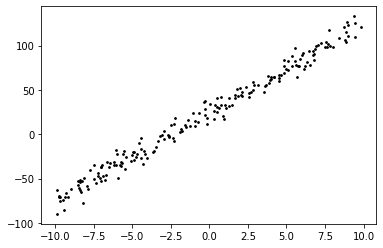

In [26]:
import numpy as np
import matplotlib.pyplot as plt

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x = data[:, 0]
y = data[:, 1]
plt.scatter(x, y, color='k',s=3)
plt.show()

2. linear regression result

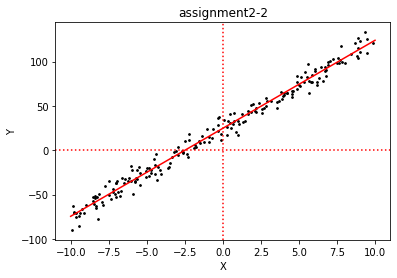

9.93415808341228 24.876386648419572


In [63]:
theta = np.random.randn(1,2)
obj = []
a= []
b= []
for i in range(1000):
    a.append(theta[0,0])
    b.append(theta[0,1])
    y_pred=theta[0,0]*x+theta[0,1]
    obj.append((1/(2*len(x)))*(np.sum((y_pred-y)**2)))
    theta[0,0]= theta[0,0]-(0.01/300)*(np.sum((y_pred-y)*x))
    theta[0,1]= theta[0,1]-(0.01/300)*(np.sum((y_pred-y)))

plt.axvline(x=0, color = 'r',linestyle=':')
plt.axhline(y=0, color = 'r',linestyle=':')
plt.title("assignment2-2")
plt.xlabel('X')
plt.ylabel('Y')
t1 = np.arange(-10.0, 10.0, 0.01)
plt.scatter(x,y,color='k',s=3)
plt.plot(t1,theta[0,0]*t1+theta[0,1],color='r')
plt.show()

print(theta[0,0],theta[0,1])

3. Plot the energy surface

In [28]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [74]:
th1= np.arange(-30, 30, 0.1)
th0 = np.arange(-30, 30, 0.1)
th0, th1 = np.meshgrid(th0, th1)

In [75]:
cost = np.zeros((600,600))
for i in range(600):
    for j in range(600):
        cost[i][j]= (1/(2*len(x)))*np.sum((th0[i][j]+th1[i][j]*x-y)**2)

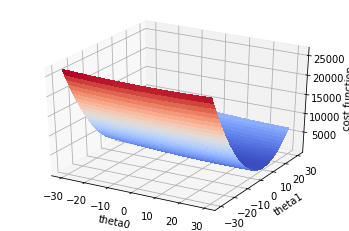

In [77]:
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(th0, th1, cost, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('cost function')
plt.show()

cost fuction이 theta0축이 상대적으로 optimize되었는지 잘 확인이 안되어 범위를 바꿔서 다시 그려보았습니다

In [80]:
th1= np.arange(-60, 60, 0.2)
th0 = np.arange(-300, 300, 1)
th0, th1 = np.meshgrid(th0, th1)
cost = np.zeros((600,600))
for i in range(600):
    for j in range(600):
        cost[i][j]= (1/(2*len(x)))*np.sum((th0[i][j]+th1[i][j]*x-y)**2)

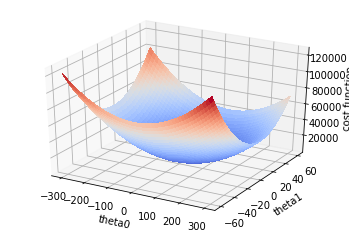

In [81]:
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(th0, th1, cost, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('cost function')
plt.show()

위그래프가 더 covex함을 직관적으로 알 수 있습니다.